<Figure size 1000x800 with 0 Axes>

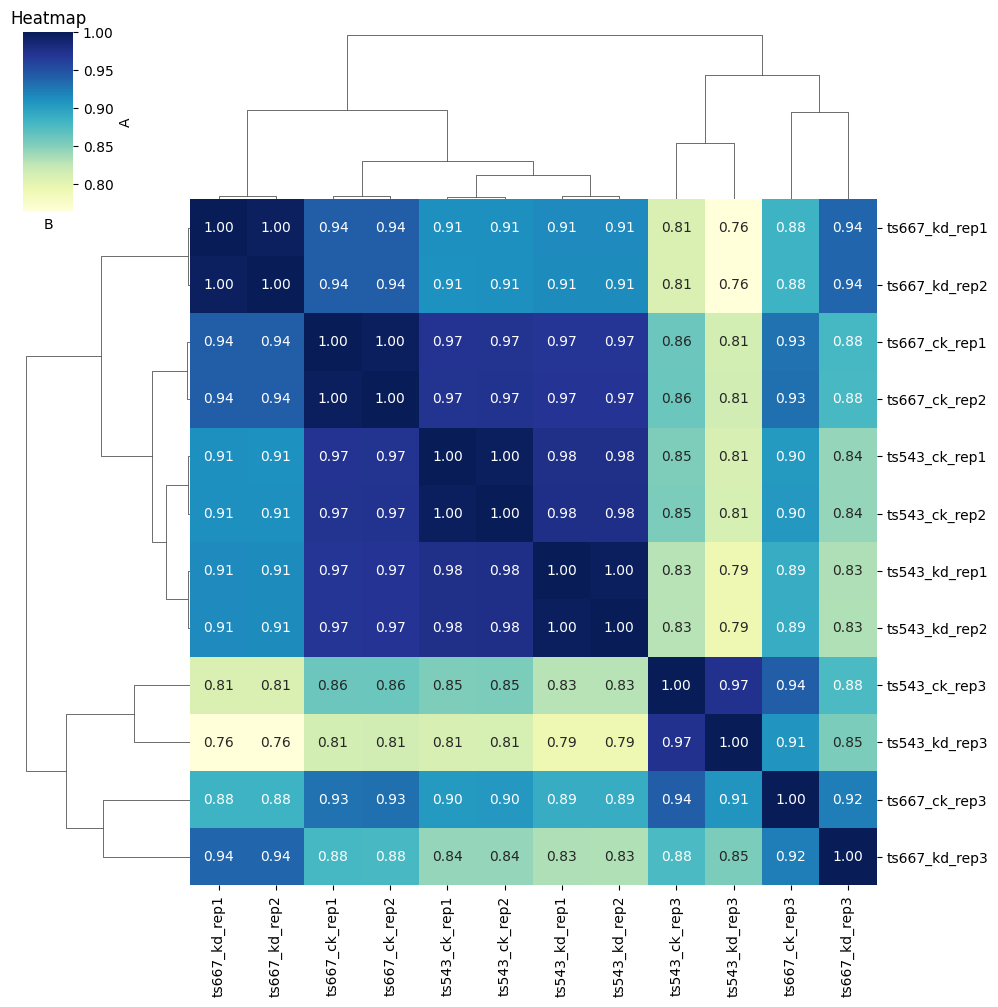

In [238]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 文件夹路径
folder_path = "."

# 获取文件夹中所有txt文件的路径列表
txt_files = [file for file in os.listdir(folder_path) if file.endswith(".txt")]

# 创建空的字典用于存储文件名与平均值
file_averages = {}

# 遍历每个txt文件
for txt_file in txt_files:
    # 提取文件名中的a1_b1_c1_a2_b2_c2部分
    file_name = txt_file.split(".")[0]
    parts = file_name.split("_")

    # 提取A和B部分
    A = "_".join(parts[:3])
    B = "_".join(parts[3:])

    # 读取文件内容
    with open(os.path.join(folder_path, txt_file), 'r') as file:
        lines = file.readlines()

    # 提取第3-26行的数据
    values = [float(line.strip()) for line in lines[2:25+1]]  # 注意修改这里的范围

    # 计算平均值
    average = np.mean(values)

    # 将平均值存储到字典中
    file_averages[(A, B)] = average

# 提取所有不同的A和B值
A_values = sorted(set([key[0] for key in file_averages.keys()]))
B_values = sorted(set([key[1] for key in file_averages.keys()]))

# 创建一个空的矩阵
matrix = np.zeros((len(A_values), len(B_values)))

# 遍历所有A和B的组合
for i, A in enumerate(A_values):
    for j, B in enumerate(B_values):
        # 构建文件名
        file_name = f"{A}_{B}.txt"

        # 如果文件名存在于字典中，则将对应的平均值放入矩阵中
        if (A, B) in file_averages:
            matrix[i, j] = file_averages[(A, B)]

# 创建带有行列名的矩阵
matrix_with_labels = np.zeros((len(A_values)+1, len(B_values)+1), dtype=object)
matrix_with_labels[0, 1:] = B_values
matrix_with_labels[1:, 0] = A_values
matrix_with_labels[1:, 1:] = matrix

# 保存矩阵到txt文件
# output_file = "output.txt"
# np.savetxt(output_file, matrix_with_labels, delimiter="\t", fmt="%s")

# print(f"矩阵已保存到文件：{output_file}")

# 绘制热图
plt.figure(figsize=(10, 8))
sns.clustermap(matrix, xticklabels=B_values, yticklabels=A_values, cmap="YlGnBu", annot=True, fmt=".2f")
plt.xlabel("B")
plt.ylabel("A")
plt.title("Heatmap")

# 显示热图
plt.show()

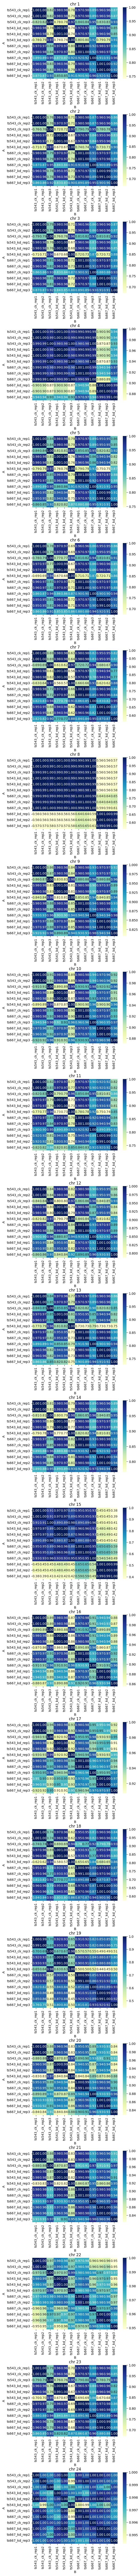

In [236]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 文件夹路径
folder_path = "."

# 获取文件夹中所有txt文件的路径列表
txt_files = [file for file in os.listdir(folder_path) if file.endswith(".txt")]

# 创建空的字典用于存储文件名与数据
file_data = {}

# 遍历每个txt文件
for txt_file in txt_files:
    # 提取文件名中的a1_b1_c1_a2_b2_c2部分
    file_name = txt_file.split(".")[0]
    parts = file_name.split("_")

    # 提取A和B部分
    A = "_".join(parts[:3])
    B = "_".join(parts[3:])

    # 读取文件内容
    with open(os.path.join(folder_path, txt_file), 'r') as file:
        lines = file.readlines()

    # 提取第3行到最后一行的数据
    line_data = [float(line.strip()) for line in lines[2:]]

    # 存储数据到字典中
    file_data[(A, B)] = {"line_data": line_data}

# 提取所有不同的A和B值
A_values = sorted(set([key[0] for key in file_data.keys()]))
B_values = sorted(set([key[1] for key in file_data.keys()]))

# 计算行数
num_rows = len(file_data[(A_values[0], B_values[0])]["line_data"])

# 创建一个行数为num_rows的子图网格
fig, axes = plt.subplots(num_rows, 1, figsize=(6, 6*num_rows))

# 遍历行数
for i in range(num_rows):
    # 提取当前行的数据
    line_data = np.zeros((len(A_values), len(B_values)))
    for j, A in enumerate(A_values):
        for k, B in enumerate(B_values):
            line_data[j, k] = file_data[(A, B)]["line_data"][i]

    # 绘制热图
    sns.heatmap(line_data, cmap="YlGnBu", annot=True, fmt=".2f", xticklabels=B_values, yticklabels=A_values, ax=axes[i])
    axes[i].set_xlabel("B")
    axes[i].set_ylabel("A")
    axes[i].set_title("chr " + str(i + 1))

    # 调整子图间的间距
    plt.subplots_adjust(hspace=0.5)

# 显示图形
plt.show()


<Figure size 1000x800 with 0 Axes>

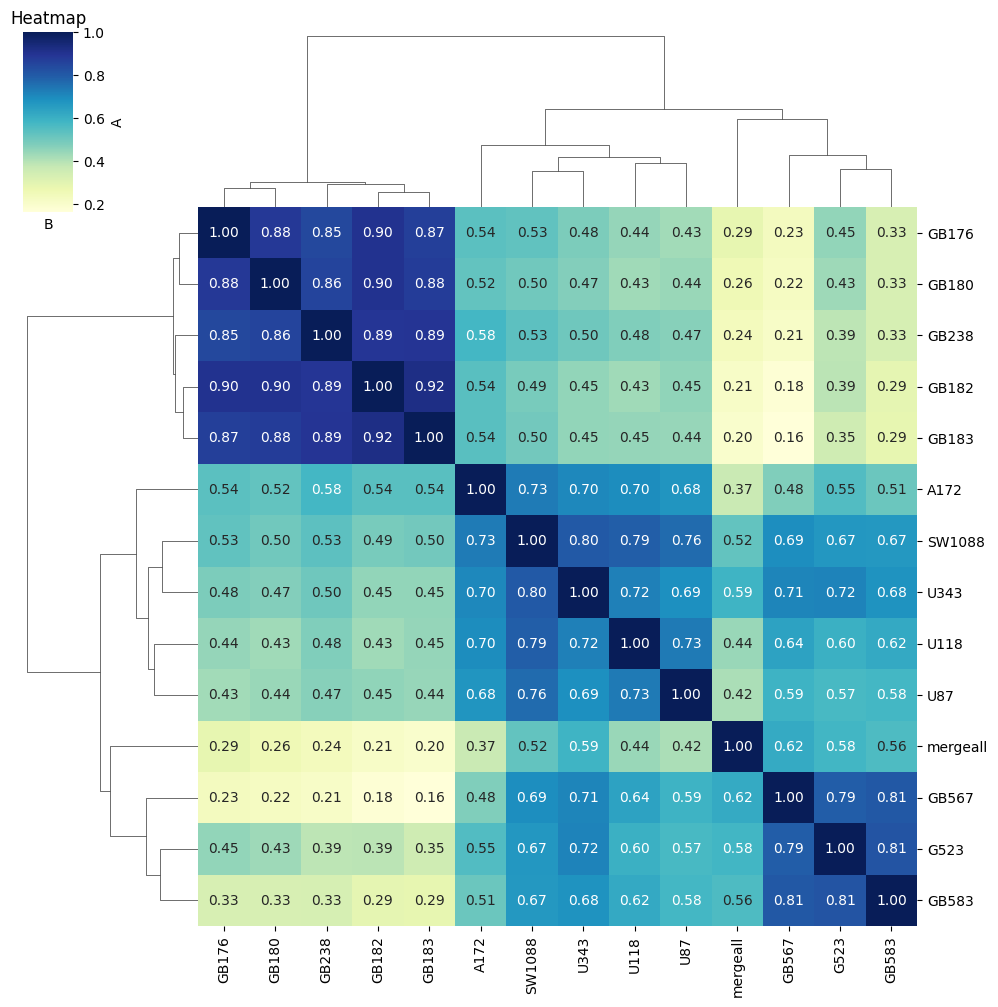

In [164]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 文件夹路径
folder_path = "/cluster/home/jialu/GBM/HiC/otherGBM/mcoolfile/100k"

# 获取文件夹中所有txt文件的路径列表
txt_files = [file for file in os.listdir(folder_path) if file.endswith(".txt")]

# 创建空的字典用于存储文件名与平均值
file_averages = {}

# 遍历每个txt文件
for txt_file in txt_files:
    # 提取文件名中的a1_b1_c1_a2_b2_c2部分
    file_name = txt_file.split(".")[0]
    parts = file_name.split("_")

    # 提取A和B部分
    A = "_".join(parts[:1])
    B = "_".join(parts[1:])

    # 读取文件内容
    with open(os.path.join(folder_path, txt_file), 'r') as file:
        lines = file.readlines()

    # 提取第3-26行的数据
    values = [float(line.strip()) for line in lines[2:26+1]]  # 注意修改这里的范围

    # 计算平均值
    average = np.mean(values)

    # 将平均值存储到字典中
    file_averages[(A, B)] = average

# 提取所有不同的A和B值
A_values = sorted(set([key[0] for key in file_averages.keys()]))
B_values = sorted(set([key[1] for key in file_averages.keys()]))

# 创建一个空的矩阵
matrix = np.zeros((len(A_values), len(B_values)))

# 遍历所有A和B的组合
for i, A in enumerate(A_values):
    for j, B in enumerate(B_values):
        # 构建文件名
        file_name = f"{A}_{B}.txt"

        # 如果文件名存在于字典中，则将对应的平均值放入矩阵中
        if (A, B) in file_averages:
            matrix[i, j] = file_averages[(A, B)]

# 创建带有行列名的矩阵
matrix_with_labels = np.zeros((len(A_values)+1, len(B_values)+1), dtype=object)
matrix_with_labels[0, 1:] = B_values
matrix_with_labels[1:, 0] = A_values
matrix_with_labels[1:, 1:] = matrix

# 保存矩阵到txt文件
# output_file = "output.txt"
# np.savetxt(output_file, matrix_with_labels, delimiter="\t", fmt="%s")

# print(f"矩阵已保存到文件：{output_file}")

# 绘制热图
plt.figure(figsize=(10, 8))
sns.clustermap(matrix, xticklabels=B_values, yticklabels=A_values, cmap="YlGnBu", annot=True, fmt=".2f")
plt.xlabel("B")
plt.ylabel("A")
plt.title("Heatmap")

# 显示热图
plt.show()

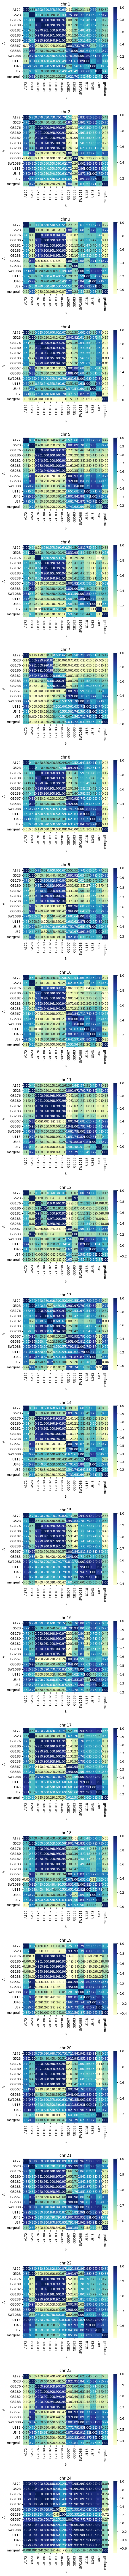

In [239]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 文件夹路径
folder_path = "/cluster/home/jialu/GBM/HiC/otherGBM/mcoolfile/100k"

# 获取文件夹中所有txt文件的路径列表
txt_files = [file for file in os.listdir(folder_path) if file.endswith(".txt")]

# 创建空的字典用于存储文件名与数据
file_data = {}

# 遍历每个txt文件
for txt_file in txt_files:
    # 提取文件名中的a1_b1_c1_a2_b2_c2部分
    file_name = txt_file.split(".")[0]
    parts = file_name.split("_")

    # 提取A和B部分
    A = "_".join(parts[:1])
    B = "_".join(parts[1:])

    # 读取文件内容
    with open(os.path.join(folder_path, txt_file), 'r') as file:
        lines = file.readlines()

    # 提取第3行到最后一行的数据
    line_data = [float(line.strip()) for line in lines[2:]]

    # 存储数据到字典中
    file_data[(A, B)] = {"line_data": line_data}

# 提取所有不同的A和B值
A_values = sorted(set([key[0] for key in file_data.keys()]))
B_values = sorted(set([key[1] for key in file_data.keys()]))

# 计算行数
num_rows = len(file_data[(A_values[0], B_values[0])]["line_data"])

# 创建一个行数为num_rows的子图网格
fig, axes = plt.subplots(num_rows, 1, figsize=(6, 6*num_rows))

# 遍历行数
for i in range(num_rows):
    # 提取当前行的数据
    line_data = np.zeros((len(A_values), len(B_values)))
    for j, A in enumerate(A_values):
        for k, B in enumerate(B_values):
            line_data[j, k] = file_data[(A, B)]["line_data"][i]

    # 绘制热图
    sns.heatmap(line_data, cmap="YlGnBu", annot=True, fmt=".2f", xticklabels=B_values, yticklabels=A_values, ax=axes[i])
    axes[i].set_xlabel("B")
    axes[i].set_ylabel("A")
    axes[i].set_title("chr " + str(i + 1))

    # 调整子图间的间距
    plt.subplots_adjust(hspace=0.5)

# 显示图形
plt.show()


<Figure size 1000x800 with 0 Axes>

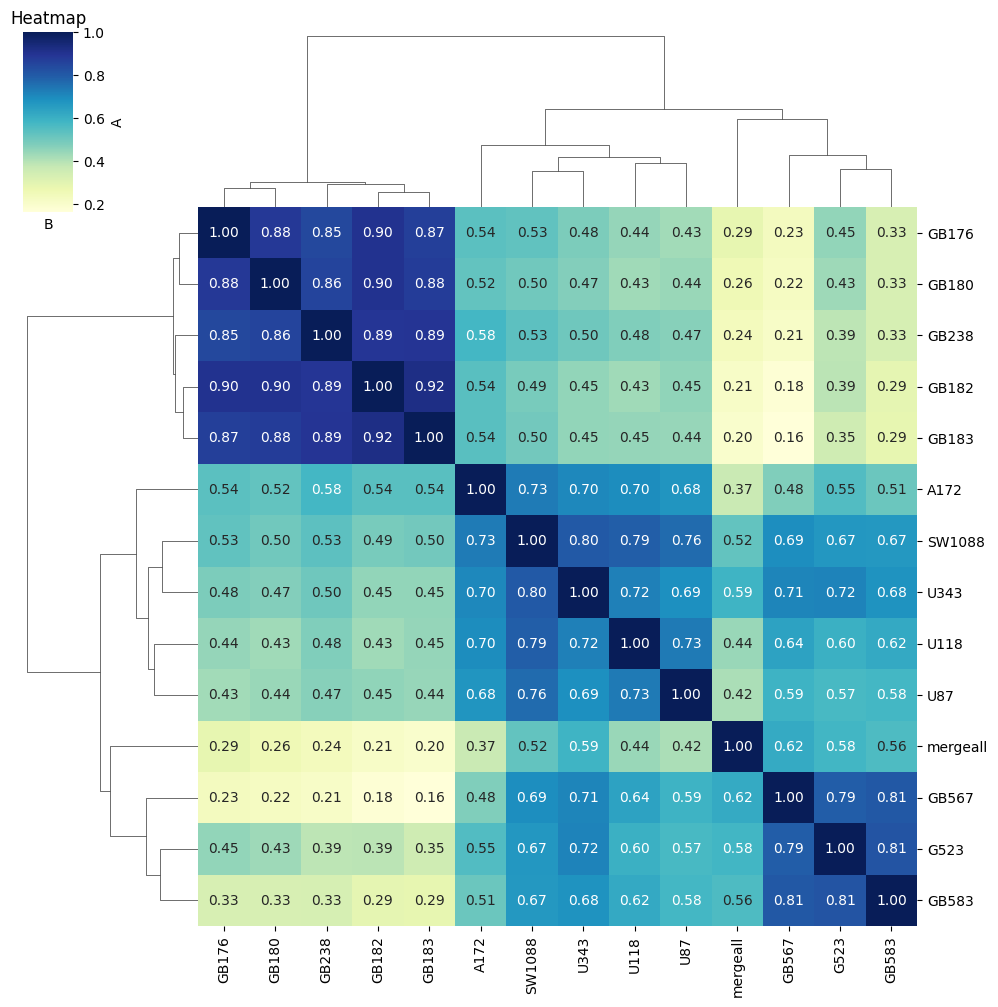

In [240]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 文件夹路径
folder_path = "/cluster/home/jialu/GBM/HiC/otherGBM/mcoolfile/100k/ICE"

# 获取文件夹中所有txt文件的路径列表
txt_files = [file for file in os.listdir(folder_path) if file.endswith(".txt")]

# 创建空的字典用于存储文件名与平均值
file_averages = {}

# 遍历每个txt文件
for txt_file in txt_files:
    # 提取文件名中的a1_b1_c1_a2_b2_c2部分
    file_name = txt_file.split(".")[0]
    parts = file_name.split("_")

    # 提取A和B部分
    A = "_".join(parts[:1])
    B = "_".join(parts[1:])

    # 读取文件内容
    with open(os.path.join(folder_path, txt_file), 'r') as file:
        lines = file.readlines()

    # 提取第3-26行的数据
    values = [float(line.strip()) for line in lines[2:26+1]]  # 注意修改这里的范围

    # 计算平均值
    average = np.mean(values)

    # 将平均值存储到字典中
    file_averages[(A, B)] = average

# 提取所有不同的A和B值
A_values = sorted(set([key[0] for key in file_averages.keys()]))
B_values = sorted(set([key[1] for key in file_averages.keys()]))

# 创建一个空的矩阵
matrix = np.zeros((len(A_values), len(B_values)))

# 遍历所有A和B的组合
for i, A in enumerate(A_values):
    for j, B in enumerate(B_values):
        # 构建文件名
        file_name = f"{A}_{B}.txt"

        # 如果文件名存在于字典中，则将对应的平均值放入矩阵中
        if (A, B) in file_averages:
            matrix[i, j] = file_averages[(A, B)]

# 创建带有行列名的矩阵
matrix_with_labels = np.zeros((len(A_values)+1, len(B_values)+1), dtype=object)
matrix_with_labels[0, 1:] = B_values
matrix_with_labels[1:, 0] = A_values
matrix_with_labels[1:, 1:] = matrix

# 保存矩阵到txt文件
# output_file = "output.txt"
# np.savetxt(output_file, matrix_with_labels, delimiter="\t", fmt="%s")

# print(f"矩阵已保存到文件：{output_file}")

# 绘制热图
plt.figure(figsize=(10, 8))
sns.clustermap(matrix, xticklabels=B_values, yticklabels=A_values, cmap="YlGnBu", annot=True, fmt=".2f")
plt.xlabel("B")
plt.ylabel("A")
plt.title("Heatmap")

# 显示热图
plt.show()

<Figure size 1000x800 with 0 Axes>

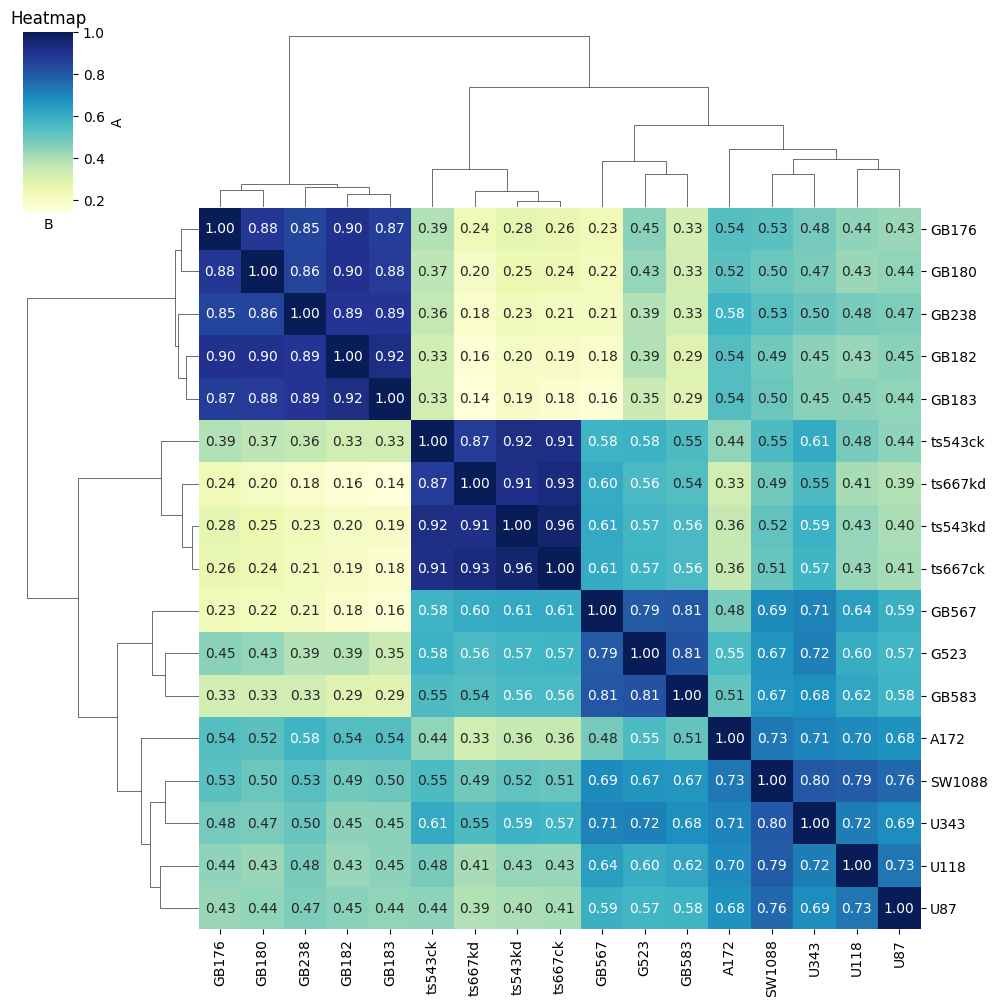

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 文件夹路径
folder_path = "/cluster/home/jialu/GBM/HiC/otherGBM/mcoolfile/100k"

# 获取文件夹中所有txt文件的路径列表
txt_files = [file for file in os.listdir(folder_path) if file.endswith(".txt")]

# 创建空的字典用于存储文件名与平均值
file_averages = {}

# 遍历每个txt文件
for txt_file in txt_files:
    # 提取文件名中的a1_b1_c1_a2_b2_c2部分
    file_name = txt_file.split(".")[0]
    parts = file_name.split("_")

    # 提取A和B部分
    A = "_".join(parts[:1])
    B = "_".join(parts[1:])

    # 读取文件内容
    with open(os.path.join(folder_path, txt_file), 'r') as file:
        lines = file.readlines()

    # 提取第3-26行的数据
    values = [float(line.strip()) for line in lines[2:25+1]]  # 注意修改这里的范围

    # 计算平均值
    average = np.mean(values)

    # 将平均值存储到字典中
    file_averages[(A, B)] = average

# 提取所有不同的A和B值
A_values = sorted(set([key[0] for key in file_averages.keys()]))
B_values = sorted(set([key[1] for key in file_averages.keys()]))

# 创建一个空的矩阵
matrix = np.zeros((len(A_values), len(B_values)))

# 遍历所有A和B的组合
for i, A in enumerate(A_values):
    for j, B in enumerate(B_values):
        # 构建文件名
        file_name = f"{A}_{B}.txt"

        # 如果文件名存在于字典中，则将对应的平均值放入矩阵中
        if (A, B) in file_averages:
            matrix[i, j] = file_averages[(A, B)]

# 创建带有行列名的矩阵
matrix_with_labels = np.zeros((len(A_values)+1, len(B_values)+1), dtype=object)
matrix_with_labels[0, 1:] = B_values
matrix_with_labels[1:, 0] = A_values
matrix_with_labels[1:, 1:] = matrix

# 保存矩阵到txt文件
# output_file = "output.txt"
# np.savetxt(output_file, matrix_with_labels, delimiter="\t", fmt="%s")

# print(f"矩阵已保存到文件：{output_file}")

# 绘制热图
plt.figure(figsize=(10, 8))
sns.clustermap(matrix, xticklabels=B_values, yticklabels=A_values, cmap="YlGnBu", annot=True, fmt=".2f")
plt.xlabel("B")
plt.ylabel("A")
plt.title("Heatmap")

# 显示热图
plt.show()

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 文件夹路径
folder_path = "/cluster/home/jialu/GBM/HiC/otherGBM/mcoolfile/100k/GBM"

# 获取文件夹中所有txt文件的路径列表
txt_files = [file for file in os.listdir(folder_path) if file.endswith(".txt")]

# 创建空的字典用于存储文件名与平均值
file_averages = {}

# 遍历每个txt文件
for txt_file in txt_files:
    # 提取文件名中的a1_b1_c1_a2_b2_c2部分
    file_name = txt_file.split(".")[0]
    parts = file_name.split("_")

    # 提取A和B部分
    A = "_".join(parts[:1])
    B = "_".join(parts[1:])

    # 读取文件内容
    with open(os.path.join(folder_path, txt_file), 'r') as file:
        lines = file.readlines()

    # 提取第3-26行的数据
    values = [float(line.strip()) for line in lines[2:25+1]]  # 注意修改这里的范围

    # 计算平均值
    average = np.mean(values)

    # 将平均值存储到字典中
    file_averages[(A, B)] = average

# 提取所有不同的A和B值
A_values = sorted(set([key[0] for key in file_averages.keys()]))
B_values = sorted(set([key[1] for key in file_averages.keys()]))

# 创建一个空的矩阵
matrix = np.zeros((len(A_values), len(B_values)))

# 遍历所有A和B的组合
for i, A in enumerate(A_values):
    for j, B in enumerate(B_values):
        # 构建文件名
        file_name = f"{A}_{B}.txt"

        # 如果文件名存在于字典中，则将对应的平均值放入矩阵中
        if (A, B) in file_averages:
            matrix[i, j] = file_averages[(A, B)]

# 创建带有行列名的矩阵
matrix_with_labels = np.zeros((len(A_values)+1, len(B_values)+1), dtype=object)
matrix_with_labels[0, 1:] = B_values
matrix_with_labels[1:, 0] = A_values
matrix_with_labels[1:, 1:] = matrix

# 保存矩阵到txt文件
# output_file = "output.txt"
# np.savetxt(output_file, matrix_with_labels, delimiter="\t", fmt="%s")

# print(f"矩阵已保存到文件：{output_file}")

# 绘制热图
plt.figure(figsize=(10, 8))
sns.clustermap(matrix, xticklabels=B_values, yticklabels=A_values, cmap="YlGnBu", annot=True, fmt=".2f")
plt.xlabel("B")
plt.ylabel("A")
plt.title("Heatmap")

# 显示热图
plt.show()